<a href="https://colab.research.google.com/github/sarathsreedharan/CSU_CS_445/blob/main/Spring25/Notebooks/module02_05_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Very helpful tutorials can be found at this site for [Pytorch tutorials](https://pytorch.org/tutorials/).

In [1]:
import numpy as np
import torch

print(torch.__version__)
import time

import matplotlib.pyplot as plt

2.5.1+cu124


## Why use PyTorch?
* Speed
* Efficiency
* GPUs
* Instead of `Y = np.tanh(Y[-1] @ W[1:, :] + W[0:1, :])` just do `Y = hidden_layer(Y)`

# torch.tensor

The core of PyTorch (and TensorFlow, etc.) is the "tensor."

The `torch` package contains classes and functions that are very similar to `numpy`.  It also provides functions to convert back and forth.

In [ ]:
data = [[0.1, 0.2, 0.3], [1.1, 1.2, 1.3], [2.1, 2.2, 2.3]]
data

[[0.1, 0.2, 0.3], [1.1, 1.2, 1.3], [2.1, 2.2, 2.3]]

In [ ]:
a = np.array(data)
a

array([[0.1, 0.2, 0.3],
       [1.1, 1.2, 1.3],
       [2.1, 2.2, 2.3]])

In [ ]:
type(a), a.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
b = torch.tensor(data)
b

tensor([[0.1000, 0.2000, 0.3000],
        [1.1000, 1.2000, 1.3000],
        [2.1000, 2.2000, 2.3000]])

In [ ]:
type(b), b.dtype

(torch.Tensor, torch.float32)

In [ ]:
c = torch.from_numpy(a)
c

tensor([[0.1000, 0.2000, 0.3000],
        [1.1000, 1.2000, 1.3000],
        [2.1000, 2.2000, 2.3000]], dtype=torch.float64)

In [ ]:
type(c), c.dtype

(torch.Tensor, torch.float64)

In [ ]:
d = torch.as_tensor(a)
d

tensor([[0.1000, 0.2000, 0.3000],
        [1.1000, 1.2000, 1.3000],
        [2.1000, 2.2000, 2.3000]], dtype=torch.float64)

In [ ]:
type(d), d.dtype

(torch.Tensor, torch.float64)

In [ ]:
e = d.numpy()
e

array([[0.1, 0.2, 0.3],
       [1.1, 1.2, 1.3],
       [2.1, 2.2, 2.3]])

In [ ]:
type(e), e.dtype

(numpy.ndarray, dtype('float64'))

`torch.tensor` copies the data.  `torch.from_numpy` and `torch.as_tensor` do not copy the data.

In [ ]:
a

array([[0.1, 0.2, 0.3],
       [1.1, 1.2, 1.3],
       [2.1, 2.2, 2.3]])

In [ ]:
b = torch.from_numpy(a)
b

tensor([[0.1000, 0.2000, 0.3000],
        [1.1000, 1.2000, 1.3000],
        [2.1000, 2.2000, 2.3000]], dtype=torch.float64)

In [ ]:
a[0,0] = 42.42
a

array([[42.42,  0.2 ,  0.3 ],
       [ 1.1 ,  1.2 ,  1.3 ],
       [ 2.1 ,  2.2 ,  2.3 ]])

In [ ]:
b

tensor([[42.4200,  0.2000,  0.3000],
        [ 1.1000,  1.2000,  1.3000],
        [ 2.1000,  2.2000,  2.3000]], dtype=torch.float64)

In [ ]:
b = torch.tensor(a)
b

tensor([[42.4200,  0.2000,  0.3000],
        [ 1.1000,  1.2000,  1.3000],
        [ 2.1000,  2.2000,  2.3000]], dtype=torch.float64)

In [ ]:
a[0,0] = 12345.0
a

array([[1.2345e+04, 2.0000e-01, 3.0000e-01],
       [1.1000e+00, 1.2000e+00, 1.3000e+00],
       [2.1000e+00, 2.2000e+00, 2.3000e+00]])

In [ ]:
b

tensor([[42.4200,  0.2000,  0.3000],
        [ 1.1000,  1.2000,  1.3000],
        [ 2.1000,  2.2000,  2.3000]], dtype=torch.float64)

We can even use `@` for matrix multiplcation as we do in `numpy`.

In [ ]:
a = np.random.uniform(-0.1, 0.1, size=(10, 5))
b = np.random.uniform(-0.1, 0.1, size=(5, 20))
c = a @ b
c.shape

(10, 20)

In [ ]:
# torch.rand?
# bt

In [ ]:
at = (torch.rand(size=(10, 5)) - 0.5) / 5
bt = (torch.rand(size=(5, 20)) - 0.5) / 5
ct = at @ bt
ct.shape

torch.Size([10, 20])

# Automatic Gradients using autograd

"To deal with hyper-planes in a 14-dimensional space, visualize a 3-D space and say â€˜fourteenâ€™ to yourself very loudly. Everyone does it." â€”Geoffrey Hinton

"That is cool." â€”Abraham Lincoln ([look it up](https://en.wikipedia.org/wiki/Cooper_Union_speech#Section_addressed_%22to_the_Southern_people%22))

People are pretty bad at calculus normally, let alone in 3+ dimensions.  Part of the reason machine learning can feel like magic (IMO) is that there's just too much math going on for one person to fathom, let alone calculate each step.

We take a lot of the work out by using matrices, and more by using GPUs, etc., but there's still explainable math going on at each step.

There's just **A LOT** of it. When building a network, it's impractical to calculate gradients for these huge composite functions, especially when they happen in high-dimensional space.

What is the derivative of $\sin(x)$?

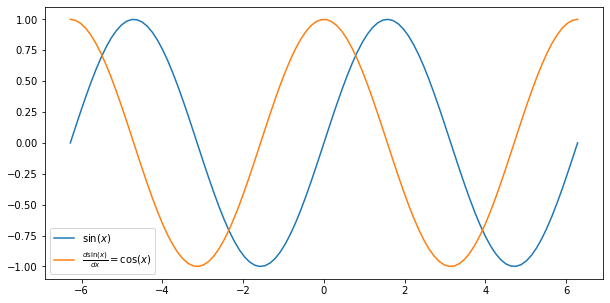

In [ ]:
plt.figure(figsize=(10, 5))
x = np.linspace(-2*np.pi, 2*np.pi, 100) # 100 evenly-spaced points on a line from -2*pi to 2*pi
y = np.sin(x)
dy = np.cos(x)
plt.plot(x, y)
plt.plot(x, dy)
plt.legend(('$\sin(x)$', '$\\frac{d \sin(x)}{dx} = \cos(x)$',));

Now, let's explore how to do this using PyTorch and tensors.

In [ ]:
xt = torch.from_numpy(x) # create a tensor from an ndarray
xt

tensor([-6.2832, -6.1563, -6.0293, -5.9024, -5.7755, -5.6485, -5.5216, -5.3947,
        -5.2677, -5.1408, -5.0139, -4.8869, -4.7600, -4.6331, -4.5061, -4.3792,
        -4.2523, -4.1253, -3.9984, -3.8715, -3.7445, -3.6176, -3.4907, -3.3637,
        -3.2368, -3.1099, -2.9829, -2.8560, -2.7291, -2.6021, -2.4752, -2.3483,
        -2.2213, -2.0944, -1.9675, -1.8405, -1.7136, -1.5867, -1.4597, -1.3328,
        -1.2059, -1.0789, -0.9520, -0.8251, -0.6981, -0.5712, -0.4443, -0.3173,
        -0.1904, -0.0635,  0.0635,  0.1904,  0.3173,  0.4443,  0.5712,  0.6981,
         0.8251,  0.9520,  1.0789,  1.2059,  1.3328,  1.4597,  1.5867,  1.7136,
         1.8405,  1.9675,  2.0944,  2.2213,  2.3483,  2.4752,  2.6021,  2.7291,
         2.8560,  2.9829,  3.1099,  3.2368,  3.3637,  3.4907,  3.6176,  3.7445,
         3.8715,  3.9984,  4.1253,  4.2523,  4.3792,  4.5061,  4.6331,  4.7600,
         4.8869,  5.0139,  5.1408,  5.2677,  5.3947,  5.5216,  5.6485,  5.7755,
         5.9024,  6.0293,  6.1563,  6.28

In [ ]:
xt.requires_grad

False

In [ ]:
xt.requires_grad_(True)

tensor([-6.2832, -6.1563, -6.0293, -5.9024, -5.7755, -5.6485, -5.5216, -5.3947,
        -5.2677, -5.1408, -5.0139, -4.8869, -4.7600, -4.6331, -4.5061, -4.3792,
        -4.2523, -4.1253, -3.9984, -3.8715, -3.7445, -3.6176, -3.4907, -3.3637,
        -3.2368, -3.1099, -2.9829, -2.8560, -2.7291, -2.6021, -2.4752, -2.3483,
        -2.2213, -2.0944, -1.9675, -1.8405, -1.7136, -1.5867, -1.4597, -1.3328,
        -1.2059, -1.0789, -0.9520, -0.8251, -0.6981, -0.5712, -0.4443, -0.3173,
        -0.1904, -0.0635,  0.0635,  0.1904,  0.3173,  0.4443,  0.5712,  0.6981,
         0.8251,  0.9520,  1.0789,  1.2059,  1.3328,  1.4597,  1.5867,  1.7136,
         1.8405,  1.9675,  2.0944,  2.2213,  2.3483,  2.4752,  2.6021,  2.7291,
         2.8560,  2.9829,  3.1099,  3.2368,  3.3637,  3.4907,  3.6176,  3.7445,
         3.8715,  3.9984,  4.1253,  4.2523,  4.3792,  4.5061,  4.6331,  4.7600,
         4.8869,  5.0139,  5.1408,  5.2677,  5.3947,  5.5216,  5.6485,  5.7755,
         5.9024,  6.0293,  6.1563,  6.28

In [ ]:
xt.requires_grad

True

By setting `.requires_grad = True`, you are starting to form a backwards graph (history) of every operation that is being applied on this tensor, which aids in calculating composite gradients.

In [ ]:
print(xt.grad_fn)

None


Now we can define our $\sin$ function.

In [ ]:
yt = torch.sin(xt)
yt

tensor([ 2.4493e-16,  1.2659e-01,  2.5115e-01,  3.7166e-01,  4.8620e-01,
         5.9291e-01,  6.9008e-01,  7.7615e-01,  8.4973e-01,  9.0963e-01,
         9.5490e-01,  9.8481e-01,  9.9887e-01,  9.9685e-01,  9.7880e-01,
         9.4500e-01,  8.9599e-01,  8.3257e-01,  7.5575e-01,  6.6677e-01,
         5.6706e-01,  4.5823e-01,  3.4202e-01,  2.2031e-01,  9.5056e-02,
        -3.1728e-02, -1.5800e-01, -2.8173e-01, -4.0093e-01, -5.1368e-01,
        -6.1816e-01, -7.1269e-01, -7.9576e-01, -8.6603e-01, -9.2235e-01,
        -9.6384e-01, -9.8982e-01, -9.9987e-01, -9.9384e-01, -9.7181e-01,
        -9.3415e-01, -8.8145e-01, -8.1458e-01, -7.3459e-01, -6.4279e-01,
        -5.4064e-01, -4.2979e-01, -3.1203e-01, -1.8925e-01, -6.3424e-02,
         6.3424e-02,  1.8925e-01,  3.1203e-01,  4.2979e-01,  5.4064e-01,
         6.4279e-01,  7.3459e-01,  8.1458e-01,  8.8145e-01,  9.3415e-01,
         9.7181e-01,  9.9384e-01,  9.9987e-01,  9.8982e-01,  9.6384e-01,
         9.2235e-01,  8.6603e-01,  7.9576e-01,  7.1

In [ ]:
xt.grad?

In [ ]:
xt.shape

torch.Size([100])

In [ ]:
yt.backward?

`yt.backward` computes $\frac{dyt}{dx}$ for every $x$ in `yt` that has `requires_grad` set to `True`.

In [ ]:
yt.backward(torch.ones(100)) # the argument represents the gradient of yt w.r.t. to itself (hence, all ones)

In [ ]:
xt.grad

tensor([ 1.0000,  0.9920,  0.9679,  0.9284,  0.8738,  0.8053,  0.7237,  0.6306,
         0.5272,  0.4154,  0.2969,  0.1736,  0.0476, -0.0792, -0.2048, -0.3271,
        -0.4441, -0.5539, -0.6549, -0.7453, -0.8237, -0.8888, -0.9397, -0.9754,
        -0.9955, -0.9995, -0.9874, -0.9595, -0.9161, -0.8580, -0.7861, -0.7015,
        -0.6056, -0.5000, -0.3863, -0.2665, -0.1423, -0.0159,  0.1108,  0.2358,
         0.3569,  0.4723,  0.5801,  0.6785,  0.7660,  0.8413,  0.9029,  0.9501,
         0.9819,  0.9980,  0.9980,  0.9819,  0.9501,  0.9029,  0.8413,  0.7660,
         0.6785,  0.5801,  0.4723,  0.3569,  0.2358,  0.1108, -0.0159, -0.1423,
        -0.2665, -0.3863, -0.5000, -0.6056, -0.7015, -0.7861, -0.8580, -0.9161,
        -0.9595, -0.9874, -0.9995, -0.9955, -0.9754, -0.9397, -0.8888, -0.8237,
        -0.7453, -0.6549, -0.5539, -0.4441, -0.3271, -0.2048, -0.0792,  0.0476,
         0.1736,  0.2969,  0.4154,  0.5272,  0.6306,  0.7237,  0.8053,  0.8738,
         0.9284,  0.9679,  0.9920,  1.00

This is now $cos(x)$.  Why?

Look above at how we compute `yt`: `yt = torch.sin(xt)`

Since `yt` is created by performing an operation over `xt`, running `yt.backward` will keep a record of updated gradients for `xt` if `xt.requires_grad` is `True` (which it is).

Be alert to your "in-place" calculations.  Anyway, let's visualize some of these operations.

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

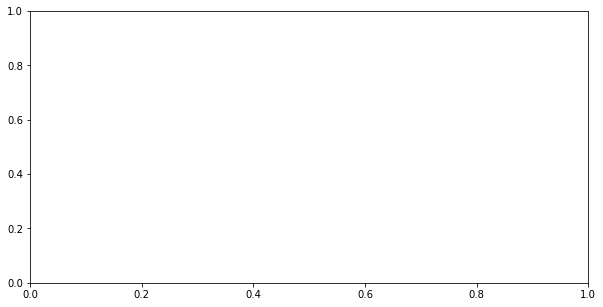

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(xt, yt)

`tensor.detach()` returns a new tensor, detached from the current graph.  Importantly, the result will never require grad. so you can poke around and explore it without worrying about changing it by performing other ops on the graph.

`.numpy()` will convert the tensor to a numpy ndarray.

Now we're back in familiar territory.

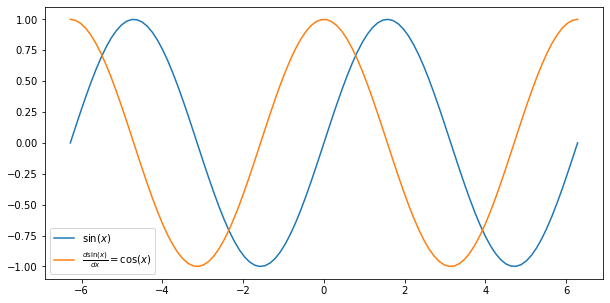

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(xt.detach(), yt.detach())
plt.plot(xt.detach(), xt.grad)
plt.legend(('$\sin(x)$', '$\\frac{d \sin(x)}{dx} = \cos(x)$'));

In [ ]:
yt = torch.sin(xt)
yt.backward(torch.ones(100))
xt.grad

tensor([ 2.0000,  1.9839,  1.9359,  1.8567,  1.7477,  1.6105,  1.4475,  1.2611,
         1.0545,  0.8308,  0.5938,  0.3473,  0.0952, -0.1585, -0.4096, -0.6541,
        -0.8881, -1.1078, -1.3097, -1.4905, -1.6474, -1.7777, -1.8794, -1.9509,
        -1.9909, -1.9990, -1.9749, -1.9190, -1.8322, -1.7160, -1.5721, -1.4029,
        -1.2112, -1.0000, -0.7727, -0.5329, -0.2846, -0.0317,  0.2217,  0.4715,
         0.7138,  0.9445,  1.1601,  1.3570,  1.5321,  1.6825,  1.8059,  1.9001,
         1.9639,  1.9960,  1.9960,  1.9639,  1.9001,  1.8059,  1.6825,  1.5321,
         1.3570,  1.1601,  0.9445,  0.7138,  0.4715,  0.2217, -0.0317, -0.2846,
        -0.5329, -0.7727, -1.0000, -1.2112, -1.4029, -1.5721, -1.7160, -1.8322,
        -1.9190, -1.9749, -1.9990, -1.9909, -1.9509, -1.8794, -1.7777, -1.6474,
        -1.4905, -1.3097, -1.1078, -0.8881, -0.6541, -0.4096, -0.1585,  0.0952,
         0.3473,  0.5938,  0.8308,  1.0545,  1.2611,  1.4475,  1.6105,  1.7477,
         1.8567,  1.9359,  1.9839,  2.00

$\frac{dsin(x)}{dx}$ = $cos(x)$, right?

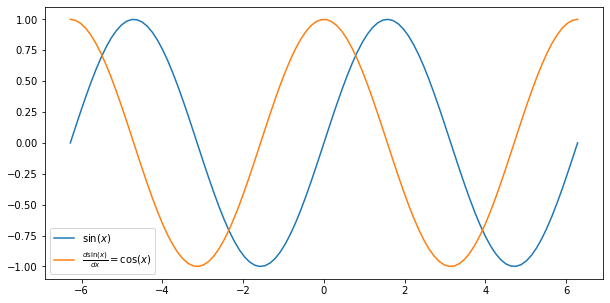

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(xt.detach(), yt.detach())
plt.plot(xt.detach(), xt.grad)
plt.legend(('$\sin(x)$', '$\\frac{d \sin(x)}{dx} = \cos(x)$'));

Above shows the magnitude of our derivative is twice what is should be.  This is because `backward` adds the gradient values to the previous values.  We must explicitly zero out the gradient first.

In [ ]:
xt.grad.zero_()
for i in range(10):
    yt = torch.sin(xt)
    yt.backward(torch.ones(100))
    print(xt.grad[0])

tensor(1., dtype=torch.float64)
tensor(2., dtype=torch.float64)
tensor(3., dtype=torch.float64)
tensor(4., dtype=torch.float64)
tensor(5., dtype=torch.float64)
tensor(6., dtype=torch.float64)
tensor(7., dtype=torch.float64)
tensor(8., dtype=torch.float64)
tensor(9., dtype=torch.float64)
tensor(10., dtype=torch.float64)


$\frac{dsin(x)}{dx}$ = $cos(x)$; $cos(0) = 1$, but each time we do this, we add one to the existing value.

In [ ]:
for i in range(10):
    xt.grad.zero_()
    yt = torch.sin(xt)
    yt.backward(torch.ones(100))
    print(xt.grad[0])

tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)


If we zero out the gradient each time, this doesn't happen.

# Train linear model of one variable using SGD in Pytorch

## First in `numpy`.

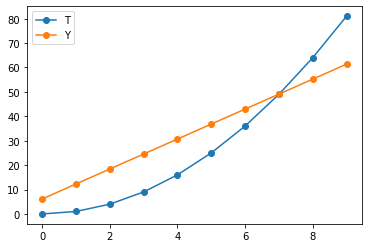

In [ ]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2

n_samples = X.shape[0]
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

W = np.zeros((2, 1))

for epoch in range(100):

    Y = X @ W[1:, :] + W[0:1, :]

    mse = ((T - Y) ** 2).mean()  # not used

    gradient = - X.T @ (T - Y)
    W -= learning_rate * gradient

plt.plot(X, T, 'o-', label='T')
plt.plot(X, Y, 'o-', label='Y')
plt.legend();

## Now in `torch`.

In [ ]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples = X.shape[0]
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X) #.float()
T = torch.from_numpy(T)

W = torch.zeros((2, 1))

for epoch in range(100):

    Y = X @ W[1:, :] + W[0:1, :]

    mse = ((T - Y) ** 2).mean()  # not used

    gradient = - X.T @ (T - Y)
    W -= learning_rate * gradient

plt.plot(X, T, 'o-', label='T')
plt.plot(X, Y, 'o-', label='Y')
plt.legend();

RuntimeError: expected scalar type Int but found Float

In [ ]:
X.dtype

torch.int32

This error is a little misleading.  It suggests that some Float should be an Int.  `X` is made of Ints, but `W` is now made of Floats. So to fix it, rather than make `W` Ints, make `X` into Floats.

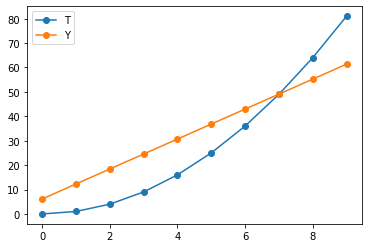

In [ ]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples = X.shape[0]
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X).float()  ## ADDED .float()
T = torch.from_numpy(T)

W = torch.zeros((2, 1))

for epoch in range(100):

    Y = X @ W[1:, :] + W[0:1, :]

    mse = ((T - Y) ** 2).mean()  # not used

    gradient = - X.T @ (T - Y)
    W -= learning_rate * gradient

plt.plot(X, T, 'o-', label='T')
plt.plot(X, Y, 'o-', label='Y')
plt.legend();

So why are we using `torch`?  Looks just like our `numpy` code?

## Let's take advantage of `autograd`!!

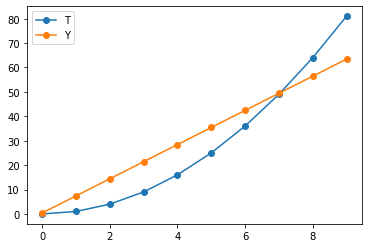

In [ ]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples = X.shape[0]
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X).float()
T = torch.from_numpy(T)

W = torch.zeros((2, 1), requires_grad=True)

for epoch in range(100):

    Y = X @ W[1:, :] + W[0:1, :]

    mse = ((T - Y)**2).mean()

    mse.backward()  ##  NEW

    with torch.no_grad():  ## NEW
        W -= learning_rate * W.grad
        W.grad.zero_()

    # compare to what we did before
    #gradient = - X.T @ (T - Y)
    #W -= learning_rate * gradient

plt.plot(X.detach(), T, 'o-', label='T')   ## NEW
plt.plot(X.detach(), Y.detach(), 'o-', label='Y')    ## NEW
plt.legend();

## Using Predefined Optimizers

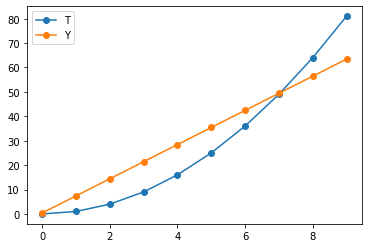

In [ ]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples = X.shape[0]
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X).float()
T = torch.from_numpy(T)

W = torch.zeros((2, 1), requires_grad=True)

optimizer = torch.optim.SGD([W], lr=learning_rate)   ## NEW

for epoch in range(100):

    Y = X @ W[1:, :] + W[0:1, :]

    mse = ((T - Y)**2).mean()
    mse.backward()

    optimizer.step()        ## NEW
    optimizer.zero_grad()   ## NEW

plt.plot(X.detach(), T, 'o-', label='T')
plt.plot(X.detach(), Y.detach(), 'o-', label='Y')
plt.legend();

Rather than implement the SGD (or Adam, etc.) step ourselves, PyTorch gives us a predefined optimizer class.  What advantages does this have?

In [ ]:
torch.optim?

List of implemented optimizers: https://pytorch.org/docs/stable/optim.html

## Using Predefined Loss Functions

In [ ]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples = X.shape[0]
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X).float()
T = torch.from_numpy(T)

W = torch.zeros((2, 1), requires_grad=True)

optimizer = torch.optim.SGD([W], lr=learning_rate)

mse_func = torch.nn.MSELoss()  ## NEW

for epoch in range(100):

    Y = X @ W[1:, :] + W[0:1, :]

    mse = mse_func(T, Y)    ## NEW
    mse.backward()

    optimizer.step()
    optimizer.zero_grad()

plt.plot(X.detach(), T, 'o-', label='T')
plt.plot(X.detach(), Y.detach(), 'o-', label='Y')
plt.legend();

RuntimeError: Found dtype Int but expected Float

This is a similar error to the one we saw about where `X` was made of Ints, but now we see it cropping up in the backward pass, where the inputs are `T` and `Y`.  We know `Y` is made of Floats as it should be.  The problem must be in `T`.

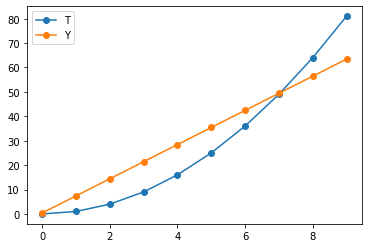

In [ ]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples = X.shape[0]
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X).float()
T = torch.from_numpy(T).float() # added .float()

W = torch.zeros((2, 1), requires_grad=True)

optimizer = torch.optim.SGD([W], lr=learning_rate)

mse_func = torch.nn.MSELoss()

for epoch in range(100):

    Y = X @ W[1:, :] + W[0:1, :]

    mse = mse_func(T, Y)
    mse.backward()

    optimizer.step()
    optimizer.zero_grad()

plt.plot(X.detach(), T, 'o-', label='T')
plt.plot(X.detach(), Y.detach(), 'o-', label='Y')
plt.legend();

## Using torch.nn module

The `torch` module includes classes that simplify the constuction of our models.  It will not look simpler for our linear model, but will for multilayered models.

In [ ]:
n_inputs = 1
n_outputs = 1

model = torch.nn.Sequential(torch.nn.Linear(n_inputs, n_outputs))
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[0.0851]], requires_grad=True),
 Parameter containing:
 tensor([0.1389], requires_grad=True)]

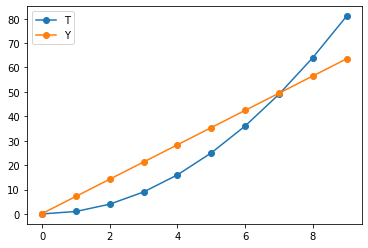

In [ ]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples, n_inputs = X.shape  ## NEW, added n_inputs
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X).float()
T = torch.from_numpy(T).float()

model = torch.nn.Sequential(torch.nn.Linear(n_inputs, n_outputs))

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse_func = torch.nn.MSELoss()

for epoch in range(100):

    Y = model(X)            ## NEW - model(X) is a simple call to the forward pass

    mse = mse_func(T, Y)
    mse.backward()

    optimizer.step()
    optimizer.zero_grad()

plt.plot(X.detach(), T, 'o-', label='T')
plt.plot(X.detach(), Y.detach(), 'o-', label='Y')
plt.legend();

Now, add a hidden layer, or two.

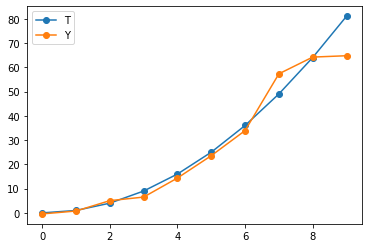

In [ ]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples, n_inputs = X.shape  ## NEW, added n_inputs
n_outputs = T.shape[1]
n_hiddens = [10, 10]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X).float()
T = torch.from_numpy(T).float()

# describe the structure of this network
model = torch.nn.Sequential(
    torch.nn.Linear(n_inputs, n_hiddens[0]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[0], n_hiddens[1]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[1], n_outputs))

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse_func = torch.nn.MSELoss()

for epoch in range(1000):

    Y = model(X)            ## NEW

    mse = mse_func(T, Y)
    mse.backward()

    optimizer.step()
    optimizer.zero_grad()

plt.plot(X.detach(), T, 'o-', label='T')
plt.plot(X.detach(), Y.detach(), 'o-', label='Y')
plt.legend();

Maybe Adam will do better.

In [ ]:
# torch.optim.Adam?
# torch.nn.Linear?

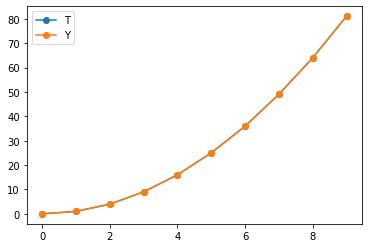

In [ ]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples, n_inputs = X.shape
n_outputs = T.shape[1]
n_hiddens = [10, 10]

learning_rate = 0.5 / (n_samples * n_outputs)  ## Larger learning rate

X = torch.from_numpy(X).float()
T = torch.from_numpy(T).float()

model = torch.nn.Sequential(
    torch.nn.Linear(n_inputs, n_hiddens[0]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[0], n_hiddens[1]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[1], n_outputs))

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # using Adam
mse_func = torch.nn.MSELoss()

for epoch in range(1000):

    Y = model(X)

    mse = mse_func(T, Y)
    mse.backward()

    optimizer.step()
    optimizer.zero_grad()

plt.plot(X.detach(), T, 'o-', label='T')
plt.plot(X.detach(), Y.detach(), 'o-', label='Y')
plt.legend();

Right on!

# Now for some Speed with a GPU

It is trivial to move data and operations down to a GPU with pytorch.

In [ ]:
import time

n = 1000
a = np.random.uniform(-0.1, 0.1, size=(n, n)).astype(np.float32)
b = np.random.uniform(-0.1, 0.1, size=(n, n)).astype(np.float32)

start_time = time.time()
for i in range(1000):
    c = a @ b
elapsed_time = time.time() - start_time

print(f'Took {elapsed_time} seconds without CUDA')
c.shape

Took 5.9714131355285645 seconds without CUDA


(1000, 1000)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
n = 1000
at = (torch.rand(size=(n, n)) - 0.5) * 0.2
bt = (torch.rand(size=(n, n)) - 0.5) * 0.2

# ct = torch.zeros((n, n))

start_time = time.time()
at = at.to('cuda')  ## Don't forget these assignments.  at.to('cuda') does not change at
bt = bt.to('cuda')

start_time = time.time()

for i in range(10000):
    ct = at @ bt

ct = ct.to('cpu')
elapsed_time = time.time() - start_time

print(f'Took {elapsed_time} seconds using CUDA on CPU')
ct.shape

Took 5.246646165847778 seconds using CUDA on CPU


torch.Size([1000, 1000])

In [ ]:
import subprocess

def use_gpu(use=True):
    if use:
        subprocess.run(['system76-power', 'graphics', 'power', 'on'])
        subprocess.run(['sudo', 'modprobe', 'nvidia'])
    else:
        subprocess.run(['sudo', 'rmmod', 'nvidia'])
        subprocess.run(['system76-power', 'graphics', 'off'])

# use_gpu()  #  if running on my system76 laptop

torch.cuda.is_available()

True

Now let's compare speed of our `torch.nn` model on more data, without and with the GPU.

Training took 10.61 seconds.


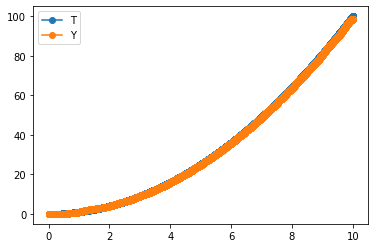

In [ ]:
use_gpu = False # not using GPU

n_samples = 10000
X = np.linspace(0, 10, n_samples).reshape((-1, 1))
T = X ** 2
n_samples, n_inputs = X.shape
n_outputs = T.shape[1]

n_hiddens = [100, 100]

learning_rate = 0.1 #  / (n_samples * n_outputs)  ## Larger learning rate

X = torch.from_numpy(X).float()
T = torch.from_numpy(T).float()

model = torch.nn.Sequential(
    torch.nn.Linear(n_inputs, n_hiddens[0]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[0], n_hiddens[1]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[1], n_outputs))

if use_gpu:
    print('Moving data and model to GPU')
    X = X.to('cuda')
    T = T.to('cuda')
    model.to('cuda')

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
mse_func = torch.nn.MSELoss()

start_time = time.time()

for epoch in range(1000):

    Y = model(X)

    mse = mse_func(T, Y)
    mse.backward()

    optimizer.step()
    optimizer.zero_grad()

elapsed_time = time.time() - start_time
print(f'Training took {elapsed_time:.2f} seconds.')
if use_gpu:
    print('   with GPU')

plt.plot(X.cpu().detach(), T.cpu(), 'o-', label='T')
plt.plot(X.cpu().detach(), Y.cpu().detach(), 'o-', label='Y')
plt.legend();

Moving data and model to GPU
Training took 1.32 seconds.
   with GPU


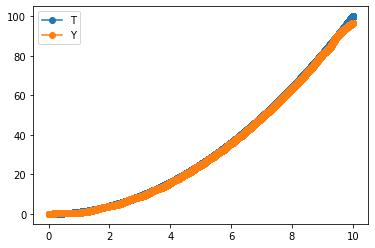

In [ ]:
use_gpu = True # using GPU

n_samples = 10000
X = np.linspace(0, 10, n_samples).reshape((-1, 1))
T = X ** 2
n_samples, n_inputs = X.shape
n_outputs = T.shape[1]

n_hiddens = [100, 100]

learning_rate = 0.1 #  / (n_samples * n_outputs)  ## Larger learning rate

X = torch.from_numpy(X).float()
T = torch.from_numpy(T).float()

model = torch.nn.Sequential(
    torch.nn.Linear(n_inputs, n_hiddens[0]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[0], n_hiddens[1]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[1], n_outputs))

if use_gpu:
    print('Moving data and model to GPU')
    X = X.to('cuda')
    T = T.to('cuda')
    model.to('cuda')

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
mse_func = torch.nn.MSELoss()

start_time = time.time()

for epoch in range(1000):

    Y = model(X)

    mse = mse_func(T, Y)
    mse.backward()

    optimizer.step()
    optimizer.zero_grad()

elapsed_time = time.time() - start_time
print(f'Training took {elapsed_time:.2f} seconds.')
if use_gpu:
    print('   with GPU')

plt.plot(X.cpu().detach(), T.cpu(), 'o-', label='T')
plt.plot(X.cpu().detach(), Y.cpu().detach(), 'o-', label='Y')
plt.legend();

# The torch.nn.Module.forward function

We just saw how to implement the neural network using `torch.nn.Sequential` as a combination of `Linear` and `Tanh` layers.  The forward calculation for such a neural network is implicitly defined this way.  

Alternatively, we can define a new class that extends `torch.nn.Module` and define the `forward` function explicitly.

Moving data and model to GPU
Training took 1.30 seconds.
   with GPU


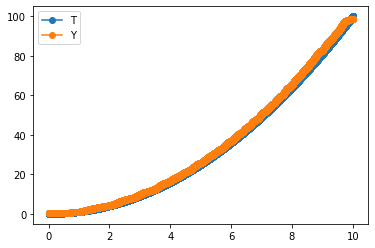

In [ ]:
use_gpu = True

n_samples = 10000
X = np.linspace(0, 10, n_samples).reshape((-1, 1))
T = X ** 2
n_samples, n_inputs = X.shape
n_outputs = T.shape[1]


X = torch.from_numpy(X).float()
T = torch.from_numpy(T).float()

class NNet(torch.nn.Module):

    def __init__(self, n_inputs, n_hiddens_list, n_outputs):
        super().__init__()  # call parent class (torch.nn.Module) constructor

        self.hidden_layers = torch.nn.ModuleList()  # necessary for model.to('cuda')
        for nh in n_hiddens_list:
            self.hidden_layers.append( torch.nn.Sequential(
                torch.nn.Linear(n_inputs, nh),
                torch.nn.Tanh()))

            n_inputs = nh
        self.output_layer = torch.nn.Linear(n_inputs, n_outputs)

    def forward(self, X):  # compare this to the forward_pass function in A2
        Y = X
        for hidden_layer in self.hidden_layers:
            Y = hidden_layer(Y)
        Y = self.output_layer(Y)
        return Y

n_hiddens = [100, 100]

learning_rate = 0.1 #  / (n_samples * n_outputs)  ## Larger learning rate

model = NNet(n_inputs, n_hiddens, n_outputs)

if use_gpu:
    print('Moving data and model to GPU')
    X = X.to('cuda')
    T = T.to('cuda')
    model.to('cuda')   # or   model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
mse_func = torch.nn.MSELoss()

start_time = time.time()

for epoch in range(1000):

    Y = model(X)

    mse = mse_func(T, Y)
    mse.backward()

    optimizer.step()
    optimizer.zero_grad()

elapsed_time = time.time() - start_time
print(f'Training took {elapsed_time:.2f} seconds.')
if use_gpu:
    print('   with GPU')

plt.plot(X.cpu().detach(), T.cpu(), 'o-', label='T')
plt.plot(X.cpu().detach(), Y.cpu().detach(), 'o-', label='Y')
plt.legend();
